<a href="https://colab.research.google.com/github/Konstvv/Machine-Learning-classes/blob/main/ML_class_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contents: Week 1

---

##Downloading and unpacking data using Pandas


> Introduction to Pandas


> Key classes and methods


> Examples






##Advanced visualization with Matplotlib

> Introduction to Matplotlib


> Concepts and visualization techniques


> Ways to vizualize data



In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Pandas

**Pandas** is a fast, powerful, flexible and easy to use open source data analysis library, built on top of the Python programming language.

**Pandas** advantages over standard data types:

* A fast and efficient **DataFrame** object for data manipulation with integrated indexing;

* Tools for reading and writing data between in-memory data structures and different formats: *CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format*;

* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

* Flexible reshaping and pivoting of data sets;

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

* Columns can be inserted and deleted from data structures for size mutability;

* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;

* High performance merging and joining of data sets;

* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

* Time series-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;

* Highly optimized for performance, with critical code paths written in Cython or C.

* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.



#Key classes and methods

###Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

s = pd.Series(data, index=index)

In [3]:
# Some examples of Series object creation

s = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
print(s)

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64


In [4]:
s = pd.Series({"a": 0.0, "b": 1.0, "c": 2.0})
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


In [5]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)

a    0.462184
b   -0.362187
c    0.746282
d    1.019143
e   -0.401944
dtype: float64


In [6]:
# Series behave like numpy arrays

s[0]

0.4621836109546572

In [13]:
#array[start:end:step]
s[:-1]

a    0.462184
b   -0.362187
c    0.746282
d    1.019143
dtype: float64

In [16]:
np.exp(s)

a    1.587537
b    0.696152
c    2.109143
d    2.770820
e    0.669018
dtype: float64

In [18]:
# Series can also behave like dict

s['c']

0.7462819352275081

In [19]:
'a' in s

True

In [20]:
'z' in s

False

In [21]:
# Vectorized operations with Series

s * 2

a    0.924367
b   -0.724375
c    1.492564
d    2.038287
e   -0.803888
dtype: float64

In [22]:
s ** 2

a    0.213614
b    0.131180
c    0.556937
d    1.038653
e    0.161559
dtype: float64

A key difference between **Series** and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [26]:
print(s)
print()
print(s[1:])
print()
print(s[:-1])
print()
print(s[1:] + s[:-1])

a    0.462184
b   -0.362187
c    0.746282
d    1.019143
e   -0.401944
dtype: float64

b   -0.362187
c    0.746282
d    1.019143
e   -0.401944
dtype: float64

a    0.462184
b   -0.362187
c    0.746282
d    1.019143
dtype: float64

a         NaN
b   -0.724375
c    1.492564
d    2.038287
e         NaN
dtype: float64


###DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

*   Dict of 1D ndarrays, lists, dicts, or Series
*   2-D numpy.ndarray
*   A Series
*   Another DataFrame

In [28]:
# Some examples of Series object creation

d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    }
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


In [29]:
d = pd.Series(range(3), index=list("abc"))
df = pd.DataFrame(d, columns=['A'])
print(df)

   A
a  0
b  1
c  2


In [30]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
df = pd.DataFrame(d, index=["a", "b", "c", "d"])
print(df)

   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


In [34]:
d = np.random.random((100, 2))
df = pd.DataFrame(d, columns=["col1", "col2"])
print(df)

        col1      col2
0   0.259033  0.936240
1   0.356613  0.321106
2   0.214407  0.744408
3   0.648541  0.882207
4   0.531104  0.404572
..       ...       ...
95  0.812453  0.846679
96  0.831462  0.857855
97  0.137404  0.179060
98  0.747825  0.138601
99  0.366094  0.101856

[100 rows x 2 columns]


In [35]:
# Printing options

print(df.head(3))

       col1      col2
0  0.259033  0.936240
1  0.356613  0.321106
2  0.214407  0.744408


In [36]:
print(df.tail(3))

        col1      col2
97  0.137404  0.179060
98  0.747825  0.138601
99  0.366094  0.101856


In [37]:
#Column selection, addition/deletion
d = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}
df = pd.DataFrame(d, index=["a", "b", "c", "d"])


print(df)

   col1  col2
a   1.0   4.0
b   2.0   3.0
c   3.0   2.0
d   4.0   1.0


In [39]:
df["col3"] = df["col2"] + df["col1"]
print(df)

   col1  col2  col3
a   1.0   4.0   5.0
b   2.0   3.0   5.0
c   3.0   2.0   5.0
d   4.0   1.0   5.0


In [43]:
df["col4"] = "abcd"
print(df)

   col1  col2  col3  col4
a   1.0   4.0   5.0  abcd
b   2.0   3.0   5.0  abcd
c   3.0   2.0   5.0  abcd
d   4.0   1.0   5.0  abcd


In [44]:
del df["col3"]

df.pop("col4")

print(df)

   col1  col2
a   1.0   4.0
b   2.0   3.0
c   3.0   2.0
d   4.0   1.0


In [47]:
# Indexing/selection

# Select column
df['col1']
# Output - Series

a    1.0
b    2.0
c    3.0
d    4.0
Name: col1, dtype: float64

In [48]:
# Select row by label 
df.loc['a']
# Output - Series

col1    1.0
col2    4.0
Name: a, dtype: float64

In [49]:
# Select row by index
df.iloc[0]
# Output - Series

col1    1.0
col2    4.0
Name: a, dtype: float64

In [50]:
# Slice rows
df[1:3]
# Output - DataFrame

,col1,col2
b,2.0,3.0
c,3.0,2.0


In [51]:
# Select rows by boolean vector
condition = [True, False, True, False]
print(df[condition])
# Output - DataFrame

   col1  col2
a   1.0   4.0
c   3.0   2.0


In [52]:
# Some useful functions

# Interpretability with numpy functions
np.log(df)

,col1,col2
a,0.000000,1.386294
b,0.693147,1.098612
c,1.098612,0.693147
d,1.386294,0.000000


In [53]:
# Indices and columns
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [54]:
df.columns

Index(['col1', 'col2'], dtype='object')

In [55]:
# Transforming to numpy array
df.to_numpy()

array([[1., 4.],
       [2., 3.],
       [3., 2.],
       [4., 1.]])

In [56]:
# Transposing
df.T

,a,b,c,d
col1,1.0,2.0,3.0,4.0
col2,4.0,3.0,2.0,1.0


In [58]:
df[df['col1'] > 3]

,col1,col2
d,4.0,1.0


In [59]:
#Boolean indexing on multiple conditions
df[(df['col1'] > 3) | (df['col2'] > 3)]

,col1,col2
a,1.0,4.0
d,4.0,1.0


In [60]:
df[(df['col1'] > 1) & (df['col2'] > 1)]

,col1,col2
b,2.0,3.0
c,3.0,2.0


#Example



###Titanic dataset

A dataset of Titanic passengers with several fields (Name, sex, age, id, etc.)

In [61]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [62]:
# Checking the count of non-null variables and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
#Useful option for data exploration: describe()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Questions


*   What if the survival rate?
*   What is the passengers age range?
*   What is wrong with the Age column?
*   What is wrong with the Fare column?






In [64]:
# Are there any differences between men and women?
data.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### Dealing with missing data

A function to use: data.dropna(subset=['col1'])



*   What columns have missing values?
*   What strategy can we use to obtain the dataset without missing values?



In [ ]:
#data.dropna()

#Introduction to Matplotlib

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

#Concepts and vizualization techniques

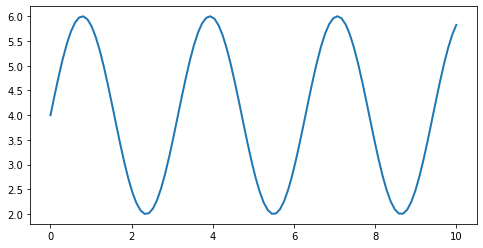

In [ ]:
#Line plot
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)


plt.figure(figsize=(8, 4))

plt.plot(x, y, linewidth=2.0)

plt.show()

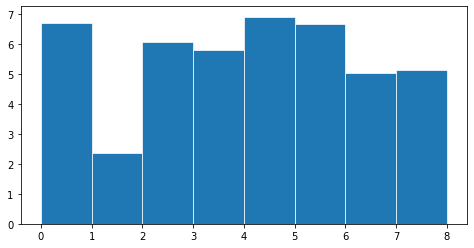

In [ ]:
# Bar plot
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))


plt.figure(figsize=(8, 4))

plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

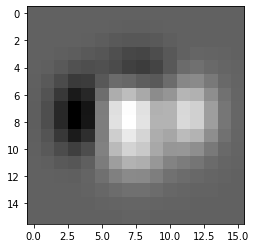

In [ ]:
# 2D plot (imshow)
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

plt.figure(figsize=(4, 4))

plt.imshow(Z, cmap='gray')

plt.show()

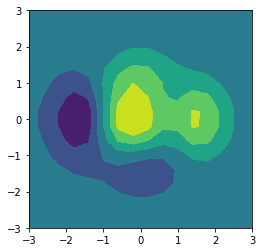

In [ ]:
# 2D contour plot
levels = np.linspace(Z.min(), Z.max(), 7)


plt.figure(figsize=(4, 4))

plt.contourf(X, Y, Z, levels=levels)

plt.show()

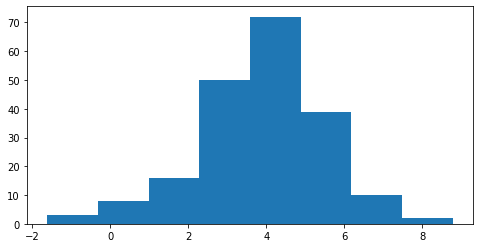

In [ ]:
# Histogram
x = 4 + np.random.normal(0, 1.5, 200)

plt.figure(figsize=(8, 4))

plt.hist(x, bins=8, linewidth=0.5)

plt.show()

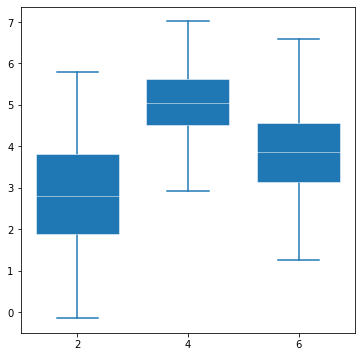

In [ ]:
# Boxplot
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))


plt.figure(figsize=(6, 6))
plt.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.show()

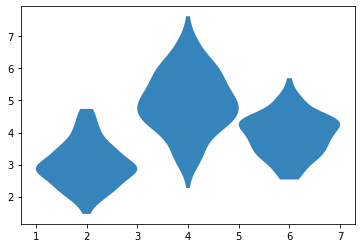

In [ ]:
# Violinplot

D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))


plt.figure(figsize=(6, 4))

vp = plt.violinplot(D, [2, 4, 6], widths=2,
                   showmeans=False, showmedians=False, showextrema=False)

for body in vp['bodies']:
    body.set_alpha(0.9)

plt.show()

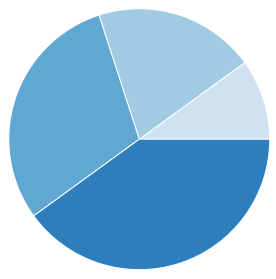

In [ ]:
# Pie chart
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
plt.figure(figsize=(2, 2))

plt.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)


plt.show()

#Ways to vizualize data

## MNIST dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

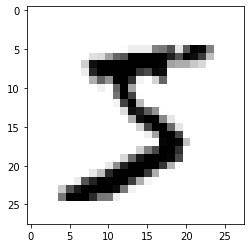

In [ ]:
# Plotting a single instance
image = X_train[0]
plt.imshow(image, cmap='gray_r')
plt.show()

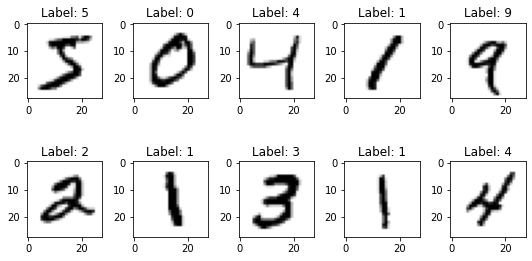

In [ ]:
# Plotting multiple instances
num_row = 2
num_col = 5
num = num_row * num_col
images = X_train[:num]
labels = Y_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))

plt.tight_layout()
plt.show()

## Going back to Titanic

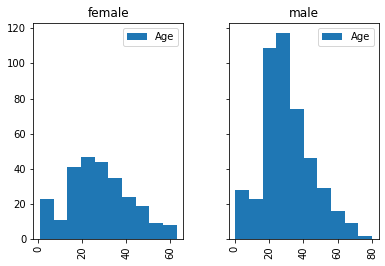

In [ ]:
#It is possible to use matplotlib functions that are already built in Pandas objects

data.hist(by='Sex', column='Age', legend=True, sharey=True)
plt.show()

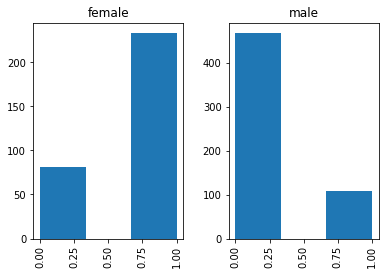

In [ ]:
data.hist(by='Sex', column='Survived', bins=3)
plt.show()

In [ ]:
# Correlation between columns

a = data.corr()
print(a)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


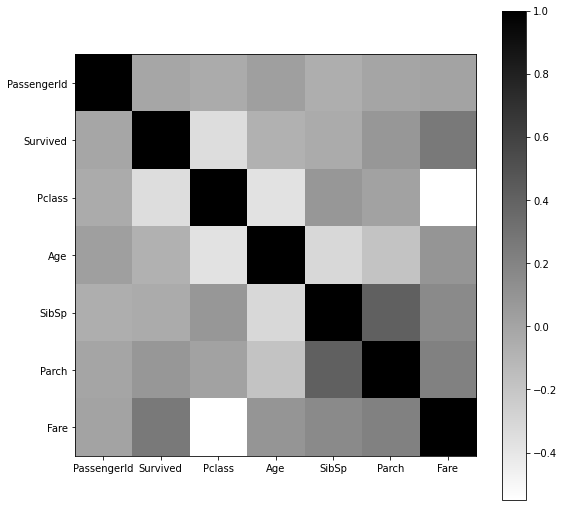

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
heatmap = ax.imshow(a, cmap='gray_r', interpolation='nearest')
ax.set_yticks(range(len(a.index.values)))
ax.set_yticklabels(a.index.values)
ax.set_xticks(range(len(a.index.values)))
ax.set_xticklabels(a.index.values)
plt.colorbar(heatmap)
plt.show()

In [ ]:
data['family'] = data['Parch'] + data['SibSp']

# Additional Questions


*   How many babies were onboard? How many people 65+?
*   What kind of tickets (what class) was prefereble for large families?
*   How much did people pay for different classes?
*   How different parameters affect the survival rate?

